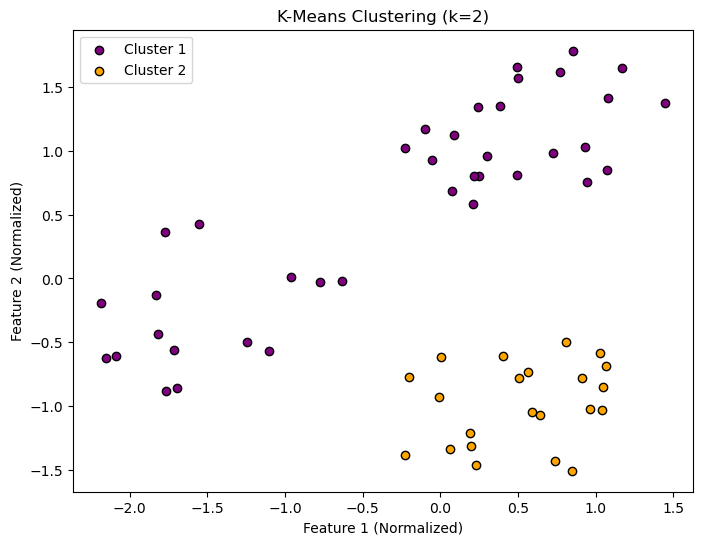

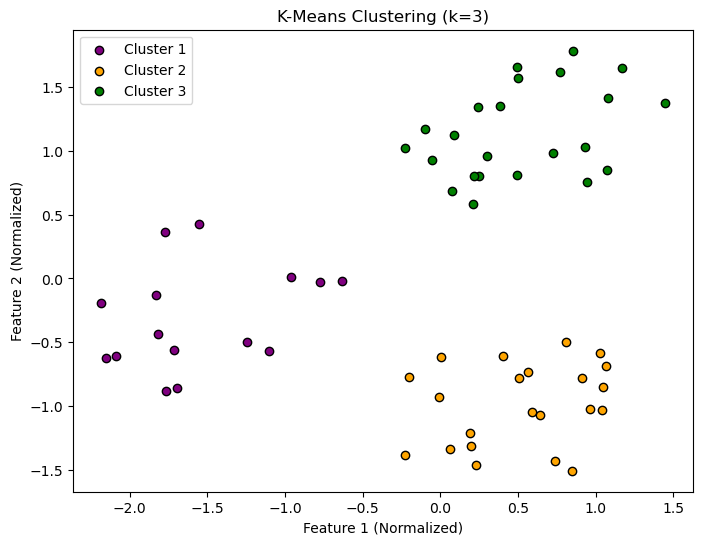

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data_path = "kmeans.csv"
df = pd.read_csv(data_path)

df = df.apply(pd.to_numeric, errors='coerce')

df = df.dropna()

X = df.to_numpy()

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def k_means(X, k, max_iters=100):
    np.random.seed(42) 
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

labels_2, centroids_2 = k_means(X, k=2)
labels_3, centroids_3 = k_means(X, k=3)

custom_cmap_2 = ['purple', 'orange']
custom_cmap_3 = ['purple', 'orange', 'green']

plt.figure(figsize=(8, 6))
for i in range(2):
    plt.scatter(X[labels_2 == i, 0], X[labels_2 == i, 1], color=custom_cmap_2[i], label=f'Cluster {i+1}', edgecolor='k')

plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('K-Means Clustering (k=2)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[labels_3 == i, 0], X[labels_3 == i, 1], color=custom_cmap_3[i], label=f'Cluster {i+1}', edgecolor='k')

plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.show()